In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "gaussian_copula"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.036772,0.050680,-0.000641,0.030283,0.027626,0.007479,-0.003459,-0.024625,0.051992,-0.030672,300.0
1,-0.010375,-0.044642,-0.047643,-0.057147,-0.060179,-0.054291,0.026483,-0.067271,-0.085705,0.020150,34.0
2,0.029804,-0.044642,-0.025835,-0.006347,0.022599,-0.020828,0.020654,-0.017954,0.067332,-0.041967,174.0
3,-0.060368,0.050680,-0.047712,0.016273,0.021905,0.046512,-0.003736,0.034556,-0.016429,-0.028893,95.0
4,0.001804,0.050680,-0.003807,0.058723,0.030537,0.038236,0.003876,0.026135,0.004804,0.015950,195.0
5,0.104846,0.050680,-0.021024,0.028933,0.048141,0.090609,-0.042924,0.081954,0.013249,0.010211,169.0
6,0.029329,0.050680,-0.026680,0.005527,0.009886,-0.018985,0.016700,-0.043713,0.027625,-0.005770,54.0
7,-0.043840,-0.044642,-0.036761,-0.025403,0.068691,0.045468,0.056160,-0.055215,0.028748,0.005790,118.0
8,-0.045640,-0.044642,-0.034900,-0.010268,0.055379,0.039464,0.062653,0.002558,-0.023979,0.005436,145.0
9,-0.003732,-0.044642,-0.024483,-0.029230,-0.024358,-0.014640,0.082229,-0.041201,-0.060629,-0.004470,93.0


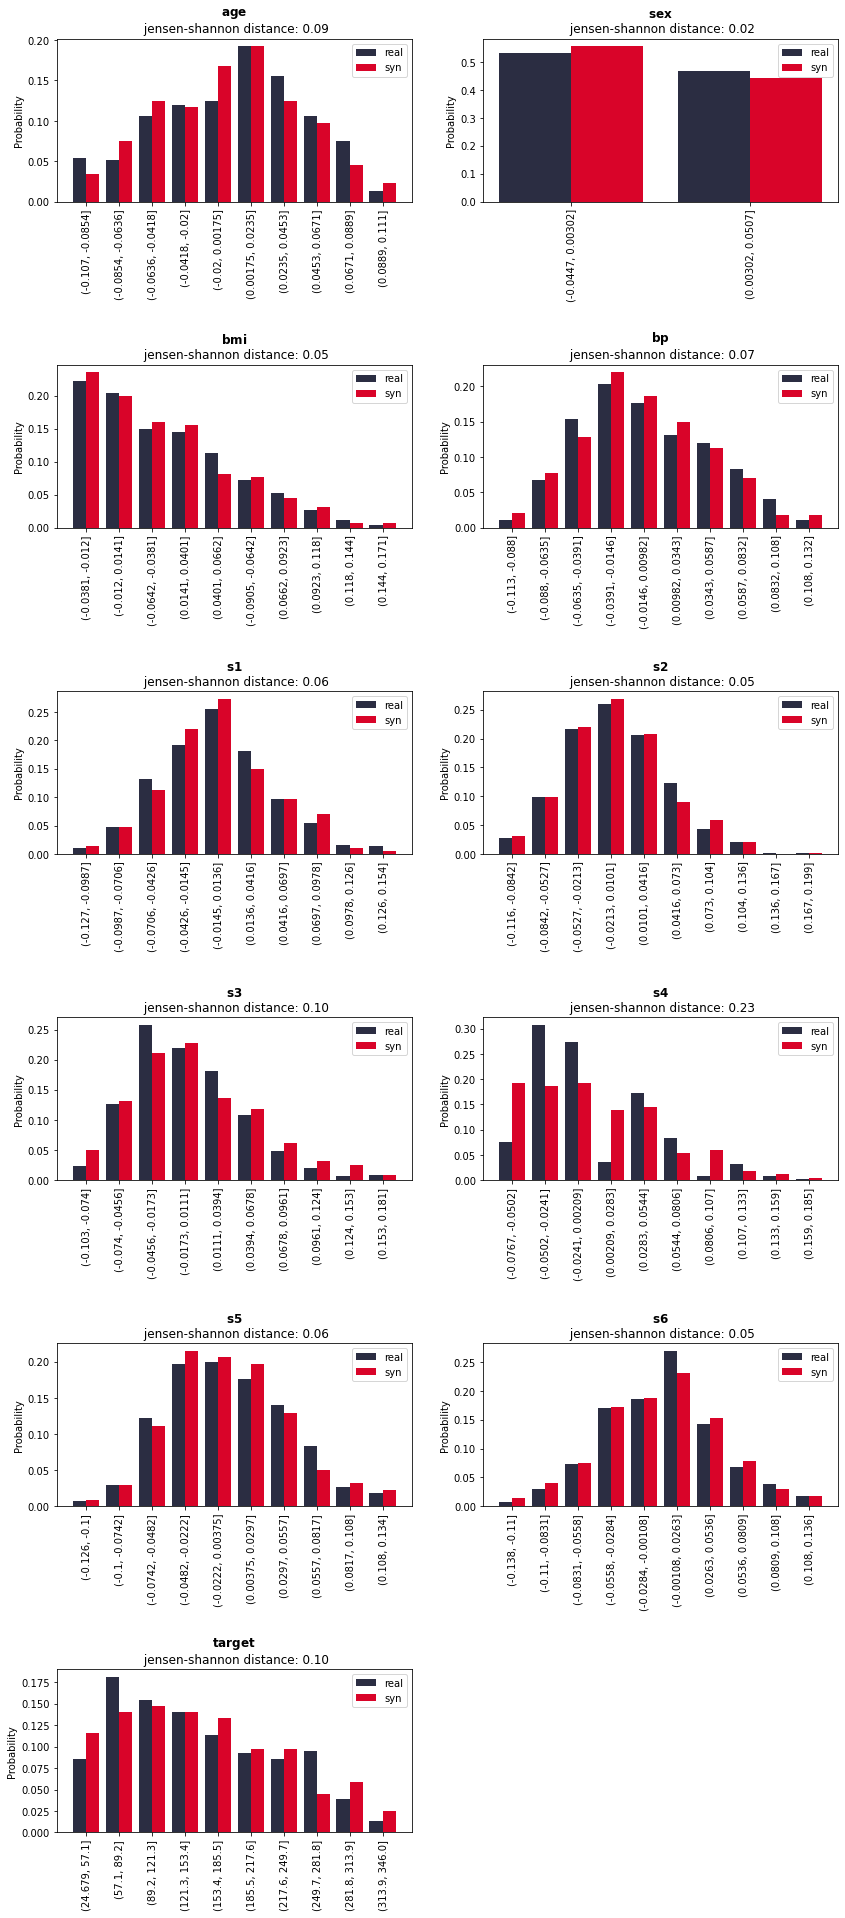

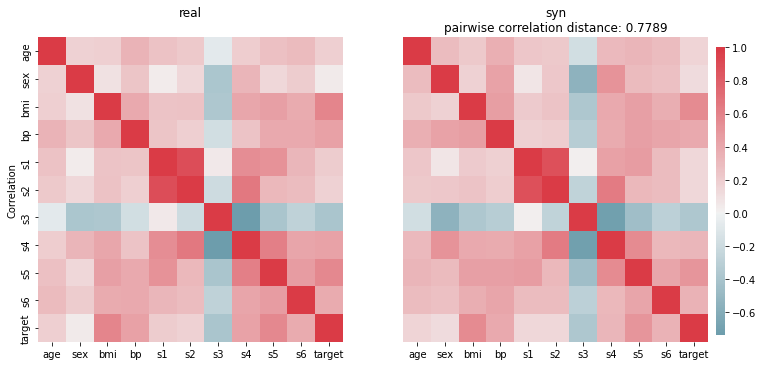

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : gaussian_copula


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.02
sanity.avg_distance_nearest_neighbor,0.048669,0.165176,0.107254,0.047566,0.107918,0.058254,3,0,0.01
sanity.inlier_probability,0.780543,0.970588,0.84917,0.086098,0.79638,0.095023,3,0,0.01
sanity.outlier_probability,0.002262,0.027149,0.010558,0.011732,0.002262,0.012443,3,0,0.01
statistical.inverse_kl_divergence,0.954712,0.963854,0.959596,0.003758,0.960223,0.004571,3,0,0.03
statistical.kolmogorov_smirnov_test,0.923694,0.929453,0.926779,0.002369,0.92719,0.002879,3,0,0.01
statistical.chi_squared_test,0.810876,0.908432,0.845501,0.044574,0.817196,0.048778,3,0,0.03
statistical.maximum_mean_discrepancy,0.004584,0.005306,0.004949,0.000295,0.004957,0.000361,3,0,0.05
statistical.inverse_cdf_distance,1.662211,1.737554,1.687821,0.035172,1.663698,0.037672,3,0,8.21
